In [1]:
import pandas as pd
import numpy as np
import math
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [2]:
(X, y), (X_test, y_test) = cifar10.load_data()

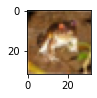

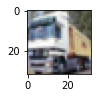

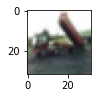

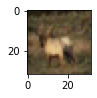

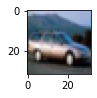

In [3]:
#plotting
from matplotlib import pyplot
for i in range(5):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [4]:
#shape of dataset
print('X_train: ' + str(X.shape))
print('Y_train: ' + str(y.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [5]:
X = X.reshape(X.shape[0], 32,32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

Reshaping the inputs

In [6]:
X = X.astype('float32')
X_test = X_test.astype('float32')

In [7]:
train_data_mean = np.mean(X,axis=0)
for i in range (X.shape[0]):
    X[i,:] -= train_data_mean
    
for i in range (X_test.shape[0]):
    X_test[i,:] -= train_data_mean

In [8]:
# Normalizing the Input space
train_data_dev = np.std(X,axis=0)
for i in range (X.shape[0]):
    X[i,:] /= train_data_dev 
    
for i in range (X_test.shape[0]):
    X_test[i,:] /= train_data_dev 

One Hot Encoding The Output

In [9]:
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
class Lenet():
  def build(self):
    model = Sequential()
    model.add(Conv2D(filters= 32, kernel_size=5, activation="relu", input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
    model.add(Conv2D(filters= 64, kernel_size=5, activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
    model.add(Conv2D(filters= 120, kernel_size=5, activation="relu"))
    model.add(Flatten())
    model.add(Dense(84, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    self.model = model

  def re_intialize(self):
    self.build()

  def summary(self):
    self.model.summary()

  def fit(self, X, y, Epochs, lr, batch, x_val=None, y_val= None ):
    adam=tensorflow.keras.optimizers.Adam(learning_rate= lr,beta_1 =0.9)
    reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.2, min_lr=1e-6)

    self.model.compile(optimizer= adam,loss='categorical_crossentropy',metrics=['accuracy'])
    self.model.fit(X,y,epochs=Epochs,validation_data=(x_val,y_val),batch_size = batch,callbacks=[reduce_lr])

  def evaluate(self,x_val,y_val):
        loss,accuracy = self.model.evaluate(x_val,y_val)
        return (loss,accuracy)

In [11]:
LeNet = Lenet()
LeNet.build()
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         192120    
                                                                 
 flatten (Flatten)           (None, 120)               0

1. What is the effect of learning rate on the training process? Which performed best? 

In [12]:
learning_rate=[0.001,0.0005,0.0001]
loss = []
accuracy = []
LeNet = Lenet()
LeNet.build()
for lr in learning_rate:
    LeNet.re_intialize()
    LeNet.fit(X,y, Epochs= 25,lr= lr, batch= int(X.shape[0]/50),x_val= X_test,y_val=y_test)
    l,a = LeNet.evaluate(X_test,y_test)
    loss.append(l)
    accuracy.append(a)

Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 1.7373 - accuracy: 0.3688

50/50 [==============================] - 5s 43ms/step - loss: 1.7308 - accuracy: 0.3710 - val_loss: 1.4633 - val_accuracy: 0.4753 - lr: 0.0010
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.3601 - accuracy: 0.5135

50/50 [==============================] - 2s 35ms/step - loss: 1.3595 - accuracy: 0.5137 - val_loss: 1.2695 - val_accuracy: 0.5461 - lr: 0.0010
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.2089 - accuracy: 0.5731

50/50 [==============================] - 2s 35ms/step - loss: 1.2075 - accuracy: 0.5736 - val_loss: 1.1490 - val_accuracy: 0.5992 - lr: 0.0010
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.0907 - accuracy: 0.6165

50/50 [==============================] - 2s 35ms/step - loss: 1.0900 - accuracy: 0.6167 - val_loss: 1.0997 - val_accuracy: 0.6161 - lr: 0.0010
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.0162 - accuracy: 0.6448

50/50 [==============================] - 2s 35ms/step - loss: 1.0156 - accuracy: 0.6450 - val_loss: 1.0620 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 0.9556 - accuracy: 0.6672

50/50 [==============================] - 2s 35ms/step - loss: 0.9541 - accuracy: 0.6675 - val_loss: 0.9745 - val_accuracy: 0.6683 - lr: 0.0010
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 0.9015 - accuracy: 0.6859

50/50 [==============================] - 2s 35ms/step - loss: 0.9013 - accuracy: 0.6859 - val_loss: 0.9643 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 0.8555 - accuracy: 0.7047

50/50 [==============================] - 2s 35ms/step - loss: 0.8544 - accuracy: 0.7053 - val_loss: 0.9507 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 0.8079 - accuracy: 0.7197

50/50 [==============================] - 2s 35ms/step - loss: 0.8079 - accuracy: 0.7198 - val_loss: 0.9195 - val_accuracy: 0.6869 - lr: 0.0010
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 0.7827 - accuracy: 0.7290

50/50 [==============================] - 2s 35ms/step - loss: 0.7815 - accuracy: 0.7295 - val_loss: 0.9054 - val_accuracy: 0.6909 - lr: 0.0010
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 0.7414 - accuracy: 0.7428

50/50 [==============================] - 2s 35ms/step - loss: 0.7400 - accuracy: 0.7434 - val_loss: 0.8912 - val_accuracy: 0.6955 - lr: 0.0010
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 0.7042 - accuracy: 0.7563

50/50 [==============================] - 2s 35ms/step - loss: 0.7043 - accuracy: 0.7564 - val_loss: 0.8931 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 0.6801 - accuracy: 0.7647

50/50 [==============================] - 2s 35ms/step - loss: 0.6799 - accuracy: 0.7648 - val_loss: 0.8747 - val_accuracy: 0.7033 - lr: 0.0010
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 0.6561 - accuracy: 0.7743

50/50 [==============================] - 2s 35ms/step - loss: 0.6566 - accuracy: 0.7742 - val_loss: 0.8862 - val_accuracy: 0.7017 - lr: 0.0010
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.6266 - accuracy: 0.7842

50/50 [==============================] - 2s 35ms/step - loss: 0.6266 - accuracy: 0.7840 - val_loss: 0.8775 - val_accuracy: 0.7101 - lr: 0.0010
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 0.5947 - accuracy: 0.7961

50/50 [==============================] - 2s 35ms/step - loss: 0.5960 - accuracy: 0.7954 - val_loss: 0.8794 - val_accuracy: 0.7124 - lr: 0.0010
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 0.5706 - accuracy: 0.8041

50/50 [==============================] - 2s 39ms/step - loss: 0.5706 - accuracy: 0.8041 - val_loss: 0.8919 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 0.5457 - accuracy: 0.8136

50/50 [==============================] - 2s 35ms/step - loss: 0.5462 - accuracy: 0.8133 - val_loss: 0.8954 - val_accuracy: 0.7074 - lr: 0.0010
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 0.5197 - accuracy: 0.8224

50/50 [==============================] - 2s 35ms/step - loss: 0.5201 - accuracy: 0.8221 - val_loss: 0.9047 - val_accuracy: 0.7124 - lr: 0.0010
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.5023 - accuracy: 0.8270

50/50 [==============================] - 2s 35ms/step - loss: 0.5027 - accuracy: 0.8268 - val_loss: 0.8893 - val_accuracy: 0.7117 - lr: 0.0010
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 0.4792 - accuracy: 0.8361

50/50 [==============================] - 2s 35ms/step - loss: 0.4798 - accuracy: 0.8359 - val_loss: 0.9242 - val_accuracy: 0.7114 - lr: 0.0010
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.4586 - accuracy: 0.8423

50/50 [==============================] - 2s 35ms/step - loss: 0.4589 - accuracy: 0.8423 - val_loss: 0.9253 - val_accuracy: 0.7139 - lr: 0.0010
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.4304 - accuracy: 0.8525

50/50 [==============================] - 2s 35ms/step - loss: 0.4298 - accuracy: 0.8528 - val_loss: 0.9416 - val_accuracy: 0.7137 - lr: 0.0010
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.4121 - accuracy: 0.8603

50/50 [==============================] - 2s 36ms/step - loss: 0.4127 - accuracy: 0.8600 - val_loss: 0.9489 - val_accuracy: 0.7087 - lr: 0.0010
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.3905 - accuracy: 0.8677

313/313 [==============================] - 1s 4ms/step - loss: 0.9788 - accuracy: 0.7135
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 1.8540 - accuracy: 0.3327

50/50 [==============================] - 3s 42ms/step - loss: 1.8494 - accuracy: 0.3341 - val_loss: 1.5732 - val_accuracy: 0.4380 - lr: 5.0000e-04
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.4982 - accuracy: 0.4626

50/50 [==============================] - 2s 35ms/step - loss: 1.4967 - accuracy: 0.4632 - val_loss: 1.4188 - val_accuracy: 0.4930 - lr: 5.0000e-04
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.3614 - accuracy: 0.5166

50/50 [==============================] - 2s 35ms/step - loss: 1.3601 - accuracy: 0.5172 - val_loss: 1.3456 - val_accuracy: 0.5205 - lr: 5.0000e-04
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.2693 - accuracy: 0.5503

50/50 [==============================] - 2s 35ms/step - loss: 1.2668 - accuracy: 0.5515 - val_loss: 1.2609 - val_accuracy: 0.5508 - lr: 5.0000e-04
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.1881 - accuracy: 0.5834

50/50 [==============================] - 2s 35ms/step - loss: 1.1883 - accuracy: 0.5833 - val_loss: 1.1934 - val_accuracy: 0.5819 - lr: 5.0000e-04
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.1213 - accuracy: 0.6073

50/50 [==============================] - 2s 35ms/step - loss: 1.1212 - accuracy: 0.6074 - val_loss: 1.1314 - val_accuracy: 0.6059 - lr: 5.0000e-04
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 1.0770 - accuracy: 0.6237

50/50 [==============================] - 2s 35ms/step - loss: 1.0765 - accuracy: 0.6240 - val_loss: 1.0971 - val_accuracy: 0.6154 - lr: 5.0000e-04
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 1.0318 - accuracy: 0.6427

50/50 [==============================] - 2s 35ms/step - loss: 1.0318 - accuracy: 0.6425 - val_loss: 1.0834 - val_accuracy: 0.6226 - lr: 5.0000e-04
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 0.9988 - accuracy: 0.6555

50/50 [==============================] - 2s 36ms/step - loss: 0.9988 - accuracy: 0.6556 - val_loss: 1.0470 - val_accuracy: 0.6346 - lr: 5.0000e-04
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 0.9646 - accuracy: 0.6673

50/50 [==============================] - 2s 36ms/step - loss: 0.9650 - accuracy: 0.6670 - val_loss: 1.0446 - val_accuracy: 0.6302 - lr: 5.0000e-04
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 0.9433 - accuracy: 0.6726

50/50 [==============================] - 2s 36ms/step - loss: 0.9442 - accuracy: 0.6729 - val_loss: 1.0228 - val_accuracy: 0.6410 - lr: 5.0000e-04
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 0.9193 - accuracy: 0.6832

50/50 [==============================] - 2s 35ms/step - loss: 0.9181 - accuracy: 0.6838 - val_loss: 1.0017 - val_accuracy: 0.6500 - lr: 5.0000e-04
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 0.8851 - accuracy: 0.6968

50/50 [==============================] - 2s 35ms/step - loss: 0.8848 - accuracy: 0.6968 - val_loss: 0.9811 - val_accuracy: 0.6594 - lr: 5.0000e-04
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 0.8651 - accuracy: 0.7037

50/50 [==============================] - 2s 35ms/step - loss: 0.8652 - accuracy: 0.7036 - val_loss: 0.9641 - val_accuracy: 0.6681 - lr: 5.0000e-04
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.8334 - accuracy: 0.7158

50/50 [==============================] - 2s 35ms/step - loss: 0.8334 - accuracy: 0.7160 - val_loss: 0.9744 - val_accuracy: 0.6627 - lr: 5.0000e-04
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 0.8154 - accuracy: 0.7197

50/50 [==============================] - 2s 36ms/step - loss: 0.8160 - accuracy: 0.7195 - val_loss: 0.9660 - val_accuracy: 0.6686 - lr: 5.0000e-04
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 0.7980 - accuracy: 0.7271

50/50 [==============================] - 2s 36ms/step - loss: 0.7989 - accuracy: 0.7266 - val_loss: 0.9417 - val_accuracy: 0.6732 - lr: 5.0000e-04
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 0.7764 - accuracy: 0.7336

50/50 [==============================] - 2s 36ms/step - loss: 0.7763 - accuracy: 0.7338 - val_loss: 0.9773 - val_accuracy: 0.6606 - lr: 5.0000e-04
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 0.7765 - accuracy: 0.7334

50/50 [==============================] - 2s 35ms/step - loss: 0.7759 - accuracy: 0.7332 - val_loss: 0.9450 - val_accuracy: 0.6777 - lr: 5.0000e-04
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.7405 - accuracy: 0.7472

50/50 [==============================] - 2s 36ms/step - loss: 0.7400 - accuracy: 0.7476 - val_loss: 0.9401 - val_accuracy: 0.6758 - lr: 5.0000e-04
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 0.7259 - accuracy: 0.7522

50/50 [==============================] - 2s 36ms/step - loss: 0.7265 - accuracy: 0.7518 - val_loss: 0.9104 - val_accuracy: 0.6906 - lr: 5.0000e-04
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.7022 - accuracy: 0.7587

50/50 [==============================] - 2s 39ms/step - loss: 0.7028 - accuracy: 0.7584 - val_loss: 0.9076 - val_accuracy: 0.6934 - lr: 5.0000e-04
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.6952 - accuracy: 0.7612

50/50 [==============================] - 2s 44ms/step - loss: 0.6946 - accuracy: 0.7615 - val_loss: 0.9126 - val_accuracy: 0.6934 - lr: 5.0000e-04
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.6808 - accuracy: 0.7668

50/50 [==============================] - 2s 36ms/step - loss: 0.6798 - accuracy: 0.7670 - val_loss: 0.9015 - val_accuracy: 0.6893 - lr: 5.0000e-04
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.6578 - accuracy: 0.7757

313/313 [==============================] - 1s 3ms/step - loss: 0.9116 - accuracy: 0.6914
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 2.1168 - accuracy: 0.2207

50/50 [==============================] - 3s 42ms/step - loss: 2.1124 - accuracy: 0.2229 - val_loss: 1.8806 - val_accuracy: 0.3286 - lr: 1.0000e-04
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.7597 - accuracy: 0.3723

50/50 [==============================] - 2s 36ms/step - loss: 1.7576 - accuracy: 0.3733 - val_loss: 1.6559 - val_accuracy: 0.4067 - lr: 1.0000e-04
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.5950 - accuracy: 0.4314

50/50 [==============================] - 2s 35ms/step - loss: 1.5931 - accuracy: 0.4325 - val_loss: 1.5377 - val_accuracy: 0.4561 - lr: 1.0000e-04
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.5071 - accuracy: 0.4654

50/50 [==============================] - 2s 36ms/step - loss: 1.5066 - accuracy: 0.4654 - val_loss: 1.4753 - val_accuracy: 0.4808 - lr: 1.0000e-04
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.4497 - accuracy: 0.4871

50/50 [==============================] - 2s 35ms/step - loss: 1.4487 - accuracy: 0.4875 - val_loss: 1.4373 - val_accuracy: 0.4880 - lr: 1.0000e-04
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.4068 - accuracy: 0.5019

50/50 [==============================] - 2s 35ms/step - loss: 1.4061 - accuracy: 0.5018 - val_loss: 1.4013 - val_accuracy: 0.5046 - lr: 1.0000e-04
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 1.3722 - accuracy: 0.5172

50/50 [==============================] - 2s 35ms/step - loss: 1.3719 - accuracy: 0.5175 - val_loss: 1.3739 - val_accuracy: 0.5165 - lr: 1.0000e-04
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 1.3374 - accuracy: 0.5291

50/50 [==============================] - 2s 35ms/step - loss: 1.3375 - accuracy: 0.5290 - val_loss: 1.3453 - val_accuracy: 0.5246 - lr: 1.0000e-04
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 1.3087 - accuracy: 0.5382

50/50 [==============================] - 2s 35ms/step - loss: 1.3098 - accuracy: 0.5379 - val_loss: 1.3126 - val_accuracy: 0.5407 - lr: 1.0000e-04
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 1.2809 - accuracy: 0.5499

50/50 [==============================] - 2s 35ms/step - loss: 1.2810 - accuracy: 0.5502 - val_loss: 1.2938 - val_accuracy: 0.5443 - lr: 1.0000e-04
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 1.2577 - accuracy: 0.5570

50/50 [==============================] - 2s 35ms/step - loss: 1.2576 - accuracy: 0.5566 - val_loss: 1.2703 - val_accuracy: 0.5571 - lr: 1.0000e-04
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 1.2362 - accuracy: 0.5665

50/50 [==============================] - 2s 36ms/step - loss: 1.2356 - accuracy: 0.5669 - val_loss: 1.2591 - val_accuracy: 0.5592 - lr: 1.0000e-04
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 1.2129 - accuracy: 0.5740

50/50 [==============================] - 2s 36ms/step - loss: 1.2132 - accuracy: 0.5740 - val_loss: 1.2353 - val_accuracy: 0.5643 - lr: 1.0000e-04
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 1.1941 - accuracy: 0.5797

50/50 [==============================] - 2s 36ms/step - loss: 1.1951 - accuracy: 0.5796 - val_loss: 1.2189 - val_accuracy: 0.5746 - lr: 1.0000e-04
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 1.1746 - accuracy: 0.5881

50/50 [==============================] - 2s 35ms/step - loss: 1.1746 - accuracy: 0.5881 - val_loss: 1.2040 - val_accuracy: 0.5773 - lr: 1.0000e-04
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 1.1606 - accuracy: 0.5940

50/50 [==============================] - 2s 35ms/step - loss: 1.1608 - accuracy: 0.5940 - val_loss: 1.1956 - val_accuracy: 0.5825 - lr: 1.0000e-04
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 1.1428 - accuracy: 0.6003

50/50 [==============================] - 2s 36ms/step - loss: 1.1417 - accuracy: 0.6008 - val_loss: 1.1775 - val_accuracy: 0.5870 - lr: 1.0000e-04
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 1.1299 - accuracy: 0.6034

50/50 [==============================] - 2s 35ms/step - loss: 1.1292 - accuracy: 0.6036 - val_loss: 1.1700 - val_accuracy: 0.5895 - lr: 1.0000e-04
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 1.1151 - accuracy: 0.6086

50/50 [==============================] - 2s 36ms/step - loss: 1.1155 - accuracy: 0.6084 - val_loss: 1.1521 - val_accuracy: 0.5967 - lr: 1.0000e-04
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 1.1011 - accuracy: 0.6135

50/50 [==============================] - 2s 36ms/step - loss: 1.1010 - accuracy: 0.6135 - val_loss: 1.1648 - val_accuracy: 0.5917 - lr: 1.0000e-04
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 1.0891 - accuracy: 0.6196

50/50 [==============================] - 2s 35ms/step - loss: 1.0905 - accuracy: 0.6192 - val_loss: 1.1297 - val_accuracy: 0.6053 - lr: 1.0000e-04
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 1.0750 - accuracy: 0.6239

50/50 [==============================] - 2s 35ms/step - loss: 1.0747 - accuracy: 0.6240 - val_loss: 1.1250 - val_accuracy: 0.6090 - lr: 1.0000e-04
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 1.0646 - accuracy: 0.6282

50/50 [==============================] - 2s 35ms/step - loss: 1.0643 - accuracy: 0.6282 - val_loss: 1.1179 - val_accuracy: 0.6107 - lr: 1.0000e-04
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 1.0543 - accuracy: 0.6319

50/50 [==============================] - 2s 35ms/step - loss: 1.0541 - accuracy: 0.6317 - val_loss: 1.1049 - val_accuracy: 0.6141 - lr: 1.0000e-04
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 1.0411 - accuracy: 0.6369

313/313 [==============================] - 1s 3ms/step - loss: 1.1000 - accuracy: 0.6163


In [13]:
df = pd.DataFrame([])
df['Learning_Rates'] = learning_rate
df['Loss'] = loss
df['Accuracy'] = accuracy

In [14]:
df

,Learning_Rates,Loss,Accuracy
0,0.0010,0.978822,0.7135
1,0.0005,0.911614,0.6914
2,0.0001,1.100046,0.6163


We can see that highest accuracy is acheived for the learning rate 0.0010 that is 0.7055

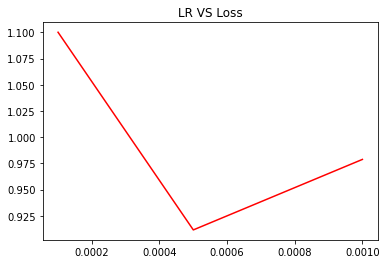

In [15]:
import matplotlib.pyplot as plt

plt.plot(learning_rate,loss,'r')
plt.title("LR VS Loss")
# plt.xlim((0,0.5))
plt.show()

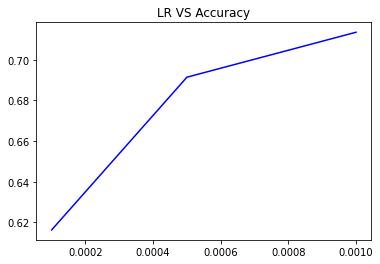

In [16]:
plt.plot(learning_rate,accuracy,'b')
plt.title("LR VS Accuracy")
# plt.xlim((0,0.5))
plt.show()

2. What is the effect of batch size on the training process? Which performed best?

In [17]:
batches = [500,1000,5000,10000]
loss = []
accuracy = []
Net = Lenet()
Net.build()
for bat in batches:
    Net.re_intialize()
    Net.fit(X,y,Epochs= 25,lr= 0.005, batch= bat,x_val= X_test,y_val=y_test)
    l,a = Net.evaluate(X_test,y_test)
    loss.append(l)
    accuracy.append(a)

Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 1.9866 - accuracy: 0.2500

100/100 [==============================] - 3s 21ms/step - loss: 1.9866 - accuracy: 0.2500 - val_loss: 1.8134 - val_accuracy: 0.3029 - lr: 0.0050
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 1.7488 - accuracy: 0.3363

100/100 [==============================] - 2s 18ms/step - loss: 1.7488 - accuracy: 0.3363 - val_loss: 1.7332 - val_accuracy: 0.3387 - lr: 0.0050
Epoch 3/25
 99/100 [============================>.] - ETA: 0s - loss: 1.6981 - accuracy: 0.3635

100/100 [==============================] - 2s 19ms/step - loss: 1.6982 - accuracy: 0.3635 - val_loss: 1.6850 - val_accuracy: 0.3674 - lr: 0.0050
Epoch 4/25
100/100 [==============================] - ETA: 0s - loss: 1.6637 - accuracy: 0.3814

100/100 [==============================] - 2s 20ms/step - loss: 1.6637 - accuracy: 0.3814 - val_loss: 1.6523 - val_accuracy: 0.3850 - lr: 0.0050
Epoch 5/25
 98/100 [============================>.] - ETA: 0s - loss: 1.6357 - accuracy: 0.3940

100/100 [==============================] - 2s 20ms/step - loss: 1.6348 - accuracy: 0.3944 - val_loss: 1.6340 - val_accuracy: 0.3907 - lr: 0.0050
Epoch 6/25
100/100 [==============================] - ETA: 0s - loss: 1.6052 - accuracy: 0.4078

100/100 [==============================] - 2s 19ms/step - loss: 1.6052 - accuracy: 0.4078 - val_loss: 1.6194 - val_accuracy: 0.4044 - lr: 0.0050
Epoch 7/25
 98/100 [============================>.] - ETA: 0s - loss: 1.5768 - accuracy: 0.4211

100/100 [==============================] - 2s 19ms/step - loss: 1.5770 - accuracy: 0.4212 - val_loss: 1.6232 - val_accuracy: 0.3961 - lr: 0.0050
Epoch 8/25
 98/100 [============================>.] - ETA: 0s - loss: 1.5650 - accuracy: 0.4276

100/100 [==============================] - 2s 19ms/step - loss: 1.5653 - accuracy: 0.4273 - val_loss: 1.6060 - val_accuracy: 0.4130 - lr: 0.0050
Epoch 9/25
 98/100 [============================>.] - ETA: 0s - loss: 1.5516 - accuracy: 0.4299

100/100 [==============================] - 2s 19ms/step - loss: 1.5503 - accuracy: 0.4303 - val_loss: 1.5933 - val_accuracy: 0.4159 - lr: 0.0050
Epoch 10/25
 98/100 [============================>.] - ETA: 0s - loss: 1.5449 - accuracy: 0.4345

100/100 [==============================] - 2s 19ms/step - loss: 1.5447 - accuracy: 0.4346 - val_loss: 1.6006 - val_accuracy: 0.4127 - lr: 0.0050
Epoch 11/25
100/100 [==============================] - ETA: 0s - loss: 1.5133 - accuracy: 0.4437

100/100 [==============================] - 2s 21ms/step - loss: 1.5133 - accuracy: 0.4437 - val_loss: 1.5610 - val_accuracy: 0.4253 - lr: 0.0050
Epoch 12/25
100/100 [==============================] - ETA: 0s - loss: 1.5063 - accuracy: 0.4473

100/100 [==============================] - 2s 19ms/step - loss: 1.5063 - accuracy: 0.4473 - val_loss: 1.5880 - val_accuracy: 0.4256 - lr: 0.0050
Epoch 13/25
 99/100 [============================>.] - ETA: 0s - loss: 1.4920 - accuracy: 0.4556

100/100 [==============================] - 2s 19ms/step - loss: 1.4923 - accuracy: 0.4555 - val_loss: 1.5499 - val_accuracy: 0.4362 - lr: 0.0050
Epoch 14/25
 99/100 [============================>.] - ETA: 0s - loss: 1.4829 - accuracy: 0.4591

100/100 [==============================] - 2s 19ms/step - loss: 1.4839 - accuracy: 0.4585 - val_loss: 1.5695 - val_accuracy: 0.4223 - lr: 0.0050
Epoch 15/25
 99/100 [============================>.] - ETA: 0s - loss: 1.4792 - accuracy: 0.4574

100/100 [==============================] - 2s 19ms/step - loss: 1.4797 - accuracy: 0.4570 - val_loss: 1.5399 - val_accuracy: 0.4368 - lr: 0.0050
Epoch 16/25
 99/100 [============================>.] - ETA: 0s - loss: 1.4636 - accuracy: 0.4657

100/100 [==============================] - 2s 19ms/step - loss: 1.4637 - accuracy: 0.4656 - val_loss: 1.5302 - val_accuracy: 0.4417 - lr: 0.0050
Epoch 17/25
 98/100 [============================>.] - ETA: 0s - loss: 1.4648 - accuracy: 0.4640

100/100 [==============================] - 2s 19ms/step - loss: 1.4650 - accuracy: 0.4641 - val_loss: 1.5265 - val_accuracy: 0.4458 - lr: 0.0050
Epoch 18/25
 98/100 [============================>.] - ETA: 0s - loss: 1.4606 - accuracy: 0.4656

100/100 [==============================] - 2s 19ms/step - loss: 1.4609 - accuracy: 0.4653 - val_loss: 1.5292 - val_accuracy: 0.4324 - lr: 0.0050
Epoch 19/25
100/100 [==============================] - ETA: 0s - loss: 1.4506 - accuracy: 0.4705

100/100 [==============================] - 2s 19ms/step - loss: 1.4506 - accuracy: 0.4705 - val_loss: 1.5412 - val_accuracy: 0.4404 - lr: 0.0050
Epoch 20/25
 99/100 [============================>.] - ETA: 0s - loss: 1.4474 - accuracy: 0.4730

100/100 [==============================] - 2s 19ms/step - loss: 1.4480 - accuracy: 0.4730 - val_loss: 1.5261 - val_accuracy: 0.4413 - lr: 0.0050
Epoch 21/25
 98/100 [============================>.] - ETA: 0s - loss: 1.4429 - accuracy: 0.4727

100/100 [==============================] - 2s 21ms/step - loss: 1.4429 - accuracy: 0.4728 - val_loss: 1.5254 - val_accuracy: 0.4468 - lr: 0.0050
Epoch 22/25
 99/100 [============================>.] - ETA: 0s - loss: 1.4359 - accuracy: 0.4760

100/100 [==============================] - 2s 19ms/step - loss: 1.4365 - accuracy: 0.4756 - val_loss: 1.5157 - val_accuracy: 0.4484 - lr: 0.0050
Epoch 23/25
100/100 [==============================] - ETA: 0s - loss: 1.4268 - accuracy: 0.4822

100/100 [==============================] - 2s 19ms/step - loss: 1.4268 - accuracy: 0.4822 - val_loss: 1.5291 - val_accuracy: 0.4442 - lr: 0.0050
Epoch 24/25
 98/100 [============================>.] - ETA: 0s - loss: 1.4235 - accuracy: 0.4815

100/100 [==============================] - 2s 19ms/step - loss: 1.4234 - accuracy: 0.4813 - val_loss: 1.5220 - val_accuracy: 0.4495 - lr: 0.0050
Epoch 25/25
100/100 [==============================] - ETA: 0s - loss: 1.4205 - accuracy: 0.4853

313/313 [==============================] - 1s 3ms/step - loss: 1.5053 - accuracy: 0.4540
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 2.0735 - accuracy: 0.2253

50/50 [==============================] - 3s 42ms/step - loss: 2.0666 - accuracy: 0.2281 - val_loss: 1.7511 - val_accuracy: 0.3566 - lr: 0.0050
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 1.5996 - accuracy: 0.4192

50/50 [==============================] - 2s 35ms/step - loss: 1.5970 - accuracy: 0.4207 - val_loss: 1.4874 - val_accuracy: 0.4629 - lr: 0.0050
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.4265 - accuracy: 0.4848

50/50 [==============================] - 2s 35ms/step - loss: 1.4251 - accuracy: 0.4854 - val_loss: 1.3537 - val_accuracy: 0.5163 - lr: 0.0050
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.3238 - accuracy: 0.5270

50/50 [==============================] - 2s 35ms/step - loss: 1.3230 - accuracy: 0.5275 - val_loss: 1.2769 - val_accuracy: 0.5435 - lr: 0.0050
Epoch 5/25
49/50 [============================>.] - ETA: 0s - loss: 1.2590 - accuracy: 0.5520

50/50 [==============================] - 2s 34ms/step - loss: 1.2587 - accuracy: 0.5521 - val_loss: 1.2394 - val_accuracy: 0.5586 - lr: 0.0050
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.2001 - accuracy: 0.5738

50/50 [==============================] - 2s 35ms/step - loss: 1.1985 - accuracy: 0.5744 - val_loss: 1.2190 - val_accuracy: 0.5646 - lr: 0.0050
Epoch 7/25
49/50 [============================>.] - ETA: 0s - loss: 1.1517 - accuracy: 0.5884

50/50 [==============================] - 2s 35ms/step - loss: 1.1514 - accuracy: 0.5890 - val_loss: 1.1520 - val_accuracy: 0.5890 - lr: 0.0050
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 1.1161 - accuracy: 0.6037

50/50 [==============================] - 2s 35ms/step - loss: 1.1156 - accuracy: 0.6038 - val_loss: 1.1311 - val_accuracy: 0.5935 - lr: 0.0050
Epoch 9/25
49/50 [============================>.] - ETA: 0s - loss: 1.1039 - accuracy: 0.6100

50/50 [==============================] - 2s 35ms/step - loss: 1.1048 - accuracy: 0.6098 - val_loss: 1.1595 - val_accuracy: 0.5910 - lr: 0.0050
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 1.0704 - accuracy: 0.6188

50/50 [==============================] - 2s 35ms/step - loss: 1.0699 - accuracy: 0.6191 - val_loss: 1.1209 - val_accuracy: 0.6049 - lr: 0.0050
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 1.0582 - accuracy: 0.6246

50/50 [==============================] - 2s 35ms/step - loss: 1.0567 - accuracy: 0.6248 - val_loss: 1.1214 - val_accuracy: 0.5990 - lr: 0.0050
Epoch 12/25
49/50 [============================>.] - ETA: 0s - loss: 1.0464 - accuracy: 0.6283

50/50 [==============================] - 2s 35ms/step - loss: 1.0461 - accuracy: 0.6288 - val_loss: 1.0861 - val_accuracy: 0.6186 - lr: 0.0050
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 1.0305 - accuracy: 0.6341

50/50 [==============================] - 2s 35ms/step - loss: 1.0312 - accuracy: 0.6341 - val_loss: 1.0868 - val_accuracy: 0.6148 - lr: 0.0050
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 1.0022 - accuracy: 0.6441

50/50 [==============================] - 2s 35ms/step - loss: 1.0028 - accuracy: 0.6438 - val_loss: 1.0692 - val_accuracy: 0.6224 - lr: 0.0050
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.9988 - accuracy: 0.6474

50/50 [==============================] - 2s 35ms/step - loss: 0.9979 - accuracy: 0.6473 - val_loss: 1.0764 - val_accuracy: 0.6172 - lr: 0.0050
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 0.9943 - accuracy: 0.6483

50/50 [==============================] - 2s 35ms/step - loss: 0.9941 - accuracy: 0.6486 - val_loss: 1.0516 - val_accuracy: 0.6296 - lr: 0.0050
Epoch 17/25
49/50 [============================>.] - ETA: 0s - loss: 0.9672 - accuracy: 0.6576

50/50 [==============================] - 2s 35ms/step - loss: 0.9666 - accuracy: 0.6574 - val_loss: 1.0491 - val_accuracy: 0.6332 - lr: 0.0050
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 0.9544 - accuracy: 0.6605

50/50 [==============================] - 2s 35ms/step - loss: 0.9557 - accuracy: 0.6599 - val_loss: 1.0256 - val_accuracy: 0.6406 - lr: 0.0050
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 0.9402 - accuracy: 0.6675

50/50 [==============================] - 2s 35ms/step - loss: 0.9412 - accuracy: 0.6672 - val_loss: 1.0628 - val_accuracy: 0.6231 - lr: 0.0050
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.9518 - accuracy: 0.6594

50/50 [==============================] - 2s 35ms/step - loss: 0.9507 - accuracy: 0.6599 - val_loss: 1.0551 - val_accuracy: 0.6272 - lr: 0.0050
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 0.9238 - accuracy: 0.6739

50/50 [==============================] - 2s 35ms/step - loss: 0.9244 - accuracy: 0.6734 - val_loss: 1.0275 - val_accuracy: 0.6386 - lr: 0.0050
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.9324 - accuracy: 0.6668

50/50 [==============================] - 2s 35ms/step - loss: 0.9311 - accuracy: 0.6672 - val_loss: 1.0745 - val_accuracy: 0.6248 - lr: 0.0050
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.9179 - accuracy: 0.6751

50/50 [==============================] - 2s 35ms/step - loss: 0.9172 - accuracy: 0.6753 - val_loss: 1.0617 - val_accuracy: 0.6319 - lr: 0.0050
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.9069 - accuracy: 0.6787

50/50 [==============================] - 2s 35ms/step - loss: 0.9065 - accuracy: 0.6785 - val_loss: 1.0492 - val_accuracy: 0.6321 - lr: 0.0050
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.9104 - accuracy: 0.6757

313/313 [==============================] - 1s 3ms/step - loss: 1.0680 - accuracy: 0.6294
Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 2.2959 - accuracy: 0.1421

10/10 [==============================] - 5s 200ms/step - loss: 2.2959 - accuracy: 0.1421 - val_loss: 2.0537 - val_accuracy: 0.2475 - lr: 0.0050
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 1.9805 - accuracy: 0.2703

10/10 [==============================] - 2s 168ms/step - loss: 1.9805 - accuracy: 0.2703 - val_loss: 1.8840 - val_accuracy: 0.3184 - lr: 0.0050
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 1.8322 - accuracy: 0.3279

10/10 [==============================] - 2s 167ms/step - loss: 1.8322 - accuracy: 0.3279 - val_loss: 1.7582 - val_accuracy: 0.3459 - lr: 0.0050
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 1.7117 - accuracy: 0.3732

10/10 [==============================] - 2s 169ms/step - loss: 1.7117 - accuracy: 0.3732 - val_loss: 1.6323 - val_accuracy: 0.4027 - lr: 0.0050
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 1.6037 - accuracy: 0.4133

10/10 [==============================] - 2s 169ms/step - loss: 1.6037 - accuracy: 0.4133 - val_loss: 1.5486 - val_accuracy: 0.4331 - lr: 0.0050
Epoch 6/25
10/10 [==============================] - ETA: 0s - loss: 1.5484 - accuracy: 0.4358

10/10 [==============================] - 2s 167ms/step - loss: 1.5484 - accuracy: 0.4358 - val_loss: 1.5019 - val_accuracy: 0.4446 - lr: 0.0050
Epoch 7/25
10/10 [==============================] - ETA: 0s - loss: 1.4769 - accuracy: 0.4595

10/10 [==============================] - 2s 170ms/step - loss: 1.4769 - accuracy: 0.4595 - val_loss: 1.4489 - val_accuracy: 0.4673 - lr: 0.0050
Epoch 8/25
10/10 [==============================] - ETA: 0s - loss: 1.4285 - accuracy: 0.4814

10/10 [==============================] - 2s 169ms/step - loss: 1.4285 - accuracy: 0.4814 - val_loss: 1.4199 - val_accuracy: 0.4799 - lr: 0.0050
Epoch 9/25
10/10 [==============================] - ETA: 0s - loss: 1.3830 - accuracy: 0.4975

10/10 [==============================] - 2s 169ms/step - loss: 1.3830 - accuracy: 0.4975 - val_loss: 1.3633 - val_accuracy: 0.5063 - lr: 0.0050
Epoch 10/25
10/10 [==============================] - ETA: 0s - loss: 1.3457 - accuracy: 0.5128

10/10 [==============================] - 2s 170ms/step - loss: 1.3457 - accuracy: 0.5128 - val_loss: 1.3496 - val_accuracy: 0.5101 - lr: 0.0050
Epoch 11/25
10/10 [==============================] - ETA: 0s - loss: 1.3047 - accuracy: 0.5296

10/10 [==============================] - 2s 169ms/step - loss: 1.3047 - accuracy: 0.5296 - val_loss: 1.3554 - val_accuracy: 0.5126 - lr: 0.0050
Epoch 12/25
10/10 [==============================] - ETA: 0s - loss: 1.3057 - accuracy: 0.5316

10/10 [==============================] - 2s 169ms/step - loss: 1.3057 - accuracy: 0.5316 - val_loss: 1.2917 - val_accuracy: 0.5383 - lr: 0.0050
Epoch 13/25
10/10 [==============================] - ETA: 0s - loss: 1.2565 - accuracy: 0.5488

10/10 [==============================] - 2s 169ms/step - loss: 1.2565 - accuracy: 0.5488 - val_loss: 1.2698 - val_accuracy: 0.5473 - lr: 0.0050
Epoch 14/25
10/10 [==============================] - ETA: 0s - loss: 1.2361 - accuracy: 0.5572

10/10 [==============================] - 2s 170ms/step - loss: 1.2361 - accuracy: 0.5572 - val_loss: 1.2688 - val_accuracy: 0.5452 - lr: 0.0050
Epoch 15/25
10/10 [==============================] - ETA: 0s - loss: 1.2182 - accuracy: 0.5637

10/10 [==============================] - 2s 168ms/step - loss: 1.2182 - accuracy: 0.5637 - val_loss: 1.2379 - val_accuracy: 0.5581 - lr: 0.0050
Epoch 16/25
10/10 [==============================] - ETA: 0s - loss: 1.1978 - accuracy: 0.5726

10/10 [==============================] - 2s 167ms/step - loss: 1.1978 - accuracy: 0.5726 - val_loss: 1.2519 - val_accuracy: 0.5557 - lr: 0.0050
Epoch 17/25
10/10 [==============================] - ETA: 0s - loss: 1.1866 - accuracy: 0.5771

10/10 [==============================] - 2s 168ms/step - loss: 1.1866 - accuracy: 0.5771 - val_loss: 1.2159 - val_accuracy: 0.5654 - lr: 0.0050
Epoch 18/25
10/10 [==============================] - ETA: 0s - loss: 1.1619 - accuracy: 0.5866

10/10 [==============================] - 2s 169ms/step - loss: 1.1619 - accuracy: 0.5866 - val_loss: 1.1925 - val_accuracy: 0.5778 - lr: 0.0050
Epoch 19/25
10/10 [==============================] - ETA: 0s - loss: 1.1554 - accuracy: 0.5891

10/10 [==============================] - 2s 167ms/step - loss: 1.1554 - accuracy: 0.5891 - val_loss: 1.1994 - val_accuracy: 0.5734 - lr: 0.0050
Epoch 20/25
10/10 [==============================] - ETA: 0s - loss: 1.1541 - accuracy: 0.5892

10/10 [==============================] - 2s 168ms/step - loss: 1.1541 - accuracy: 0.5892 - val_loss: 1.1948 - val_accuracy: 0.5764 - lr: 0.0050
Epoch 21/25
10/10 [==============================] - ETA: 0s - loss: 1.1209 - accuracy: 0.5991

10/10 [==============================] - 2s 172ms/step - loss: 1.1209 - accuracy: 0.5991 - val_loss: 1.1902 - val_accuracy: 0.5749 - lr: 0.0050
Epoch 22/25
10/10 [==============================] - ETA: 0s - loss: 1.1159 - accuracy: 0.6031

10/10 [==============================] - 2s 169ms/step - loss: 1.1159 - accuracy: 0.6031 - val_loss: 1.1669 - val_accuracy: 0.5898 - lr: 0.0050
Epoch 23/25
10/10 [==============================] - ETA: 0s - loss: 1.1101 - accuracy: 0.6055

10/10 [==============================] - 2s 168ms/step - loss: 1.1101 - accuracy: 0.6055 - val_loss: 1.1627 - val_accuracy: 0.5888 - lr: 0.0050
Epoch 24/25
10/10 [==============================] - ETA: 0s - loss: 1.0935 - accuracy: 0.6091

10/10 [==============================] - 2s 168ms/step - loss: 1.0935 - accuracy: 0.6091 - val_loss: 1.1633 - val_accuracy: 0.5916 - lr: 0.0050
Epoch 25/25
10/10 [==============================] - ETA: 0s - loss: 1.0814 - accuracy: 0.6152

313/313 [==============================] - 1s 3ms/step - loss: 1.1492 - accuracy: 0.5962
Epoch 1/25
5/5 [==============================] - ETA: 0s - loss: 2.6020 - accuracy: 0.1365

5/5 [==============================] - 7s 408ms/step - loss: 2.6020 - accuracy: 0.1365 - val_loss: 2.2672 - val_accuracy: 0.1278 - lr: 0.0050
Epoch 2/25
5/5 [==============================] - ETA: 0s - loss: 2.2583 - accuracy: 0.1204

5/5 [==============================] - 2s 347ms/step - loss: 2.2583 - accuracy: 0.1204 - val_loss: 2.2208 - val_accuracy: 0.1294 - lr: 0.0050
Epoch 3/25
5/5 [==============================] - ETA: 0s - loss: 2.2084 - accuracy: 0.1680

5/5 [==============================] - 2s 339ms/step - loss: 2.2084 - accuracy: 0.1680 - val_loss: 2.1809 - val_accuracy: 0.2184 - lr: 0.0050
Epoch 4/25
5/5 [==============================] - ETA: 0s - loss: 2.1488 - accuracy: 0.2257

5/5 [==============================] - 2s 342ms/step - loss: 2.1488 - accuracy: 0.2257 - val_loss: 2.0953 - val_accuracy: 0.2355 - lr: 0.0050
Epoch 5/25
5/5 [==============================] - ETA: 0s - loss: 2.0307 - accuracy: 0.2580

5/5 [==============================] - 2s 341ms/step - loss: 2.0307 - accuracy: 0.2580 - val_loss: 1.9343 - val_accuracy: 0.2914 - lr: 0.0050
Epoch 6/25
5/5 [==============================] - ETA: 0s - loss: 1.8984 - accuracy: 0.3046

5/5 [==============================] - 2s 345ms/step - loss: 1.8984 - accuracy: 0.3046 - val_loss: 1.8268 - val_accuracy: 0.3374 - lr: 0.0050
Epoch 7/25
5/5 [==============================] - ETA: 0s - loss: 1.8022 - accuracy: 0.3412

5/5 [==============================] - 2s 343ms/step - loss: 1.8022 - accuracy: 0.3412 - val_loss: 1.7684 - val_accuracy: 0.3531 - lr: 0.0050
Epoch 8/25
5/5 [==============================] - ETA: 0s - loss: 1.7505 - accuracy: 0.3613

5/5 [==============================] - 2s 346ms/step - loss: 1.7505 - accuracy: 0.3613 - val_loss: 1.7051 - val_accuracy: 0.3803 - lr: 0.0050
Epoch 9/25
5/5 [==============================] - ETA: 0s - loss: 1.6712 - accuracy: 0.3894

5/5 [==============================] - 2s 345ms/step - loss: 1.6712 - accuracy: 0.3894 - val_loss: 1.6303 - val_accuracy: 0.4032 - lr: 0.0050
Epoch 10/25
5/5 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.4115

5/5 [==============================] - 2s 344ms/step - loss: 1.6095 - accuracy: 0.4115 - val_loss: 1.6227 - val_accuracy: 0.4079 - lr: 0.0050
Epoch 11/25
5/5 [==============================] - ETA: 0s - loss: 1.6188 - accuracy: 0.4161

5/5 [==============================] - 2s 343ms/step - loss: 1.6188 - accuracy: 0.4161 - val_loss: 1.5790 - val_accuracy: 0.4343 - lr: 0.0050
Epoch 12/25
5/5 [==============================] - ETA: 0s - loss: 1.5607 - accuracy: 0.4333

5/5 [==============================] - 2s 347ms/step - loss: 1.5607 - accuracy: 0.4333 - val_loss: 1.5185 - val_accuracy: 0.4482 - lr: 0.0050
Epoch 13/25
5/5 [==============================] - ETA: 0s - loss: 1.5056 - accuracy: 0.4526

5/5 [==============================] - 2s 344ms/step - loss: 1.5056 - accuracy: 0.4526 - val_loss: 1.4873 - val_accuracy: 0.4557 - lr: 0.0050
Epoch 14/25
5/5 [==============================] - ETA: 0s - loss: 1.4667 - accuracy: 0.4659

5/5 [==============================] - 2s 345ms/step - loss: 1.4667 - accuracy: 0.4659 - val_loss: 1.4594 - val_accuracy: 0.4693 - lr: 0.0050
Epoch 15/25
5/5 [==============================] - ETA: 0s - loss: 1.4392 - accuracy: 0.4800

5/5 [==============================] - 2s 346ms/step - loss: 1.4392 - accuracy: 0.4800 - val_loss: 1.4362 - val_accuracy: 0.4765 - lr: 0.0050
Epoch 16/25
5/5 [==============================] - ETA: 0s - loss: 1.3987 - accuracy: 0.4938

5/5 [==============================] - 2s 347ms/step - loss: 1.3987 - accuracy: 0.4938 - val_loss: 1.4587 - val_accuracy: 0.4777 - lr: 0.0050
Epoch 17/25
5/5 [==============================] - ETA: 0s - loss: 1.4663 - accuracy: 0.4755

5/5 [==============================] - 2s 346ms/step - loss: 1.4663 - accuracy: 0.4755 - val_loss: 1.4772 - val_accuracy: 0.4634 - lr: 0.0050
Epoch 18/25
5/5 [==============================] - ETA: 0s - loss: 1.4275 - accuracy: 0.4845

5/5 [==============================] - 2s 349ms/step - loss: 1.4275 - accuracy: 0.4845 - val_loss: 1.4172 - val_accuracy: 0.4913 - lr: 0.0050
Epoch 19/25
5/5 [==============================] - ETA: 0s - loss: 1.3704 - accuracy: 0.5070

5/5 [==============================] - 2s 345ms/step - loss: 1.3704 - accuracy: 0.5070 - val_loss: 1.3861 - val_accuracy: 0.5016 - lr: 0.0050
Epoch 20/25
5/5 [==============================] - ETA: 0s - loss: 1.3388 - accuracy: 0.5145

5/5 [==============================] - 2s 347ms/step - loss: 1.3388 - accuracy: 0.5145 - val_loss: 1.3575 - val_accuracy: 0.5106 - lr: 0.0050
Epoch 21/25
5/5 [==============================] - ETA: 0s - loss: 1.3121 - accuracy: 0.5262

5/5 [==============================] - 2s 349ms/step - loss: 1.3121 - accuracy: 0.5262 - val_loss: 1.3399 - val_accuracy: 0.5177 - lr: 0.0050
Epoch 22/25
5/5 [==============================] - ETA: 0s - loss: 1.2896 - accuracy: 0.5348

5/5 [==============================] - 2s 349ms/step - loss: 1.2896 - accuracy: 0.5348 - val_loss: 1.3257 - val_accuracy: 0.5255 - lr: 0.0050
Epoch 23/25
5/5 [==============================] - ETA: 0s - loss: 1.2694 - accuracy: 0.5436

5/5 [==============================] - 2s 354ms/step - loss: 1.2694 - accuracy: 0.5436 - val_loss: 1.2991 - val_accuracy: 0.5344 - lr: 0.0050
Epoch 24/25
5/5 [==============================] - ETA: 0s - loss: 1.2468 - accuracy: 0.5529

5/5 [==============================] - 2s 350ms/step - loss: 1.2468 - accuracy: 0.5529 - val_loss: 1.2812 - val_accuracy: 0.5439 - lr: 0.0050
Epoch 25/25
5/5 [==============================] - ETA: 0s - loss: 1.2419 - accuracy: 0.5537

313/313 [==============================] - 1s 4ms/step - loss: 1.3025 - accuracy: 0.5344


In [18]:
df = pd.DataFrame([])
df['Batch'] = batches
df['Loss'] = loss
df['Accuracy'] = accuracy

In [19]:
df

,Batch,Loss,Accuracy
0,500,1.505275,0.4540
1,1000,1.068042,0.6294
2,5000,1.149189,0.5962
3,10000,1.302480,0.5344


For model 2 we can see that highest accuracy is reached for batch size of 1000

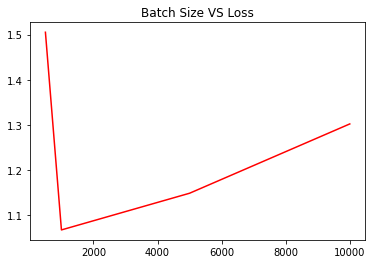

In [20]:
plt.plot(batches,loss,'r')
plt.title("Batch Size VS Loss")
# plt.xlim((0,0.5))
plt.show()

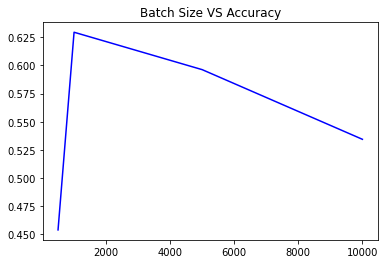

In [21]:
plt.plot(batches,accuracy,'b')
plt.title("Batch Size VS Accuracy")
# plt.xlim((0,0.5))
plt.show()

3. Try different hyperparameters to obtain the best accuracy on the test set. What is your
best performance and what were the hyperparameters?

The best learning rate that we can find from above experiment is 0.001 and the best batch size would be 1000. Therefore we consyruct a model using this optimized hyperparameter. 

In [22]:
Net = Lenet()
Net.build()
Net.fit(X,y,Epochs= 50,lr= 0.001, batch= 1000,x_val= X_test,y_val=y_test)
l,a = Net.evaluate(X_test,y_test)

Epoch 1/50
49/50 [============================>.] - ETA: 0s - loss: 1.7419 - accuracy: 0.3736

50/50 [==============================] - 3s 42ms/step - loss: 1.7362 - accuracy: 0.3759 - val_loss: 1.4710 - val_accuracy: 0.4772 - lr: 0.0010
Epoch 2/50
49/50 [============================>.] - ETA: 0s - loss: 1.3712 - accuracy: 0.5112

50/50 [==============================] - 2s 35ms/step - loss: 1.3692 - accuracy: 0.5121 - val_loss: 1.2694 - val_accuracy: 0.5502 - lr: 0.0010
Epoch 3/50
49/50 [============================>.] - ETA: 0s - loss: 1.2098 - accuracy: 0.5764

50/50 [==============================] - 2s 34ms/step - loss: 1.2085 - accuracy: 0.5768 - val_loss: 1.1505 - val_accuracy: 0.5935 - lr: 0.0010
Epoch 4/50
49/50 [============================>.] - ETA: 0s - loss: 1.0950 - accuracy: 0.6194

50/50 [==============================] - 2s 35ms/step - loss: 1.0933 - accuracy: 0.6198 - val_loss: 1.0973 - val_accuracy: 0.6149 - lr: 0.0010
Epoch 5/50
49/50 [============================>.] - ETA: 0s - loss: 1.0040 - accuracy: 0.6516

50/50 [==============================] - 2s 35ms/step - loss: 1.0032 - accuracy: 0.6516 - val_loss: 1.0405 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 6/50
49/50 [============================>.] - ETA: 0s - loss: 0.9539 - accuracy: 0.6711

50/50 [==============================] - 2s 35ms/step - loss: 0.9534 - accuracy: 0.6715 - val_loss: 0.9968 - val_accuracy: 0.6585 - lr: 0.0010
Epoch 7/50
49/50 [============================>.] - ETA: 0s - loss: 0.8997 - accuracy: 0.6886

50/50 [==============================] - 2s 35ms/step - loss: 0.9005 - accuracy: 0.6886 - val_loss: 0.9732 - val_accuracy: 0.6664 - lr: 0.0010
Epoch 8/50
49/50 [============================>.] - ETA: 0s - loss: 0.8406 - accuracy: 0.7116

50/50 [==============================] - 2s 35ms/step - loss: 0.8417 - accuracy: 0.7111 - val_loss: 0.9367 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 9/50
49/50 [============================>.] - ETA: 0s - loss: 0.8002 - accuracy: 0.7239

50/50 [==============================] - 2s 35ms/step - loss: 0.8010 - accuracy: 0.7236 - val_loss: 0.9182 - val_accuracy: 0.6850 - lr: 0.0010
Epoch 10/50
49/50 [============================>.] - ETA: 0s - loss: 0.7608 - accuracy: 0.7370

50/50 [==============================] - 2s 36ms/step - loss: 0.7607 - accuracy: 0.7372 - val_loss: 0.9090 - val_accuracy: 0.6872 - lr: 0.0010
Epoch 11/50
49/50 [============================>.] - ETA: 0s - loss: 0.7357 - accuracy: 0.7471

50/50 [==============================] - 2s 35ms/step - loss: 0.7353 - accuracy: 0.7473 - val_loss: 0.9398 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 12/50
49/50 [============================>.] - ETA: 0s - loss: 0.6955 - accuracy: 0.7612

50/50 [==============================] - 2s 35ms/step - loss: 0.6955 - accuracy: 0.7614 - val_loss: 0.9322 - val_accuracy: 0.6877 - lr: 0.0010
Epoch 13/50
49/50 [============================>.] - ETA: 0s - loss: 0.6681 - accuracy: 0.7707

50/50 [==============================] - 2s 35ms/step - loss: 0.6688 - accuracy: 0.7706 - val_loss: 0.9177 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 14/50
49/50 [============================>.] - ETA: 0s - loss: 0.6294 - accuracy: 0.7825

50/50 [==============================] - 2s 35ms/step - loss: 0.6299 - accuracy: 0.7824 - val_loss: 0.8806 - val_accuracy: 0.7015 - lr: 0.0010
Epoch 15/50
49/50 [============================>.] - ETA: 0s - loss: 0.5968 - accuracy: 0.7945

50/50 [==============================] - 2s 35ms/step - loss: 0.5961 - accuracy: 0.7947 - val_loss: 0.8720 - val_accuracy: 0.7033 - lr: 0.0010
Epoch 16/50
49/50 [============================>.] - ETA: 0s - loss: 0.5781 - accuracy: 0.8008

50/50 [==============================] - 2s 35ms/step - loss: 0.5791 - accuracy: 0.8006 - val_loss: 0.8952 - val_accuracy: 0.6998 - lr: 0.0010
Epoch 17/50
49/50 [============================>.] - ETA: 0s - loss: 0.5685 - accuracy: 0.8030

50/50 [==============================] - 2s 35ms/step - loss: 0.5682 - accuracy: 0.8034 - val_loss: 0.8840 - val_accuracy: 0.7075 - lr: 0.0010
Epoch 18/50
49/50 [============================>.] - ETA: 0s - loss: 0.5255 - accuracy: 0.8192

50/50 [==============================] - 2s 36ms/step - loss: 0.5275 - accuracy: 0.8182 - val_loss: 0.9275 - val_accuracy: 0.6894 - lr: 0.0010
Epoch 19/50
49/50 [============================>.] - ETA: 0s - loss: 0.5023 - accuracy: 0.8276

50/50 [==============================] - 2s 35ms/step - loss: 0.5032 - accuracy: 0.8273 - val_loss: 0.9035 - val_accuracy: 0.7113 - lr: 0.0010
Epoch 20/50
49/50 [============================>.] - ETA: 0s - loss: 0.4862 - accuracy: 0.8310

50/50 [==============================] - 2s 35ms/step - loss: 0.4866 - accuracy: 0.8312 - val_loss: 0.9717 - val_accuracy: 0.6901 - lr: 0.0010
Epoch 21/50
49/50 [============================>.] - ETA: 0s - loss: 0.4548 - accuracy: 0.8417

50/50 [==============================] - 2s 35ms/step - loss: 0.4552 - accuracy: 0.8419 - val_loss: 0.9581 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 22/50
49/50 [============================>.] - ETA: 0s - loss: 0.4236 - accuracy: 0.8555

50/50 [==============================] - 2s 35ms/step - loss: 0.4229 - accuracy: 0.8558 - val_loss: 0.9361 - val_accuracy: 0.7077 - lr: 0.0010
Epoch 23/50
49/50 [============================>.] - ETA: 0s - loss: 0.3984 - accuracy: 0.8639

50/50 [==============================] - 2s 35ms/step - loss: 0.3992 - accuracy: 0.8635 - val_loss: 0.9776 - val_accuracy: 0.7017 - lr: 0.0010
Epoch 24/50
49/50 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8666

50/50 [==============================] - 2s 35ms/step - loss: 0.3868 - accuracy: 0.8670 - val_loss: 0.9847 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 25/50
49/50 [============================>.] - ETA: 0s - loss: 0.3633 - accuracy: 0.8760

50/50 [==============================] - 2s 35ms/step - loss: 0.3638 - accuracy: 0.8756 - val_loss: 1.0254 - val_accuracy: 0.6934 - lr: 0.0010
Epoch 26/50
49/50 [============================>.] - ETA: 0s - loss: 0.3445 - accuracy: 0.8828

50/50 [==============================] - 2s 35ms/step - loss: 0.3435 - accuracy: 0.8834 - val_loss: 1.0264 - val_accuracy: 0.7027 - lr: 0.0010
Epoch 27/50
49/50 [============================>.] - ETA: 0s - loss: 0.3221 - accuracy: 0.8923

50/50 [==============================] - 2s 35ms/step - loss: 0.3216 - accuracy: 0.8924 - val_loss: 1.0487 - val_accuracy: 0.6982 - lr: 0.0010
Epoch 28/50
49/50 [============================>.] - ETA: 0s - loss: 0.3010 - accuracy: 0.8995

50/50 [==============================] - 2s 35ms/step - loss: 0.3019 - accuracy: 0.8990 - val_loss: 1.0696 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 29/50
49/50 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.9047

50/50 [==============================] - 2s 35ms/step - loss: 0.2820 - accuracy: 0.9045 - val_loss: 1.0841 - val_accuracy: 0.7014 - lr: 0.0010
Epoch 30/50
49/50 [============================>.] - ETA: 0s - loss: 0.2638 - accuracy: 0.9118

50/50 [==============================] - 2s 35ms/step - loss: 0.2640 - accuracy: 0.9118 - val_loss: 1.1376 - val_accuracy: 0.6987 - lr: 0.0010
Epoch 31/50
49/50 [============================>.] - ETA: 0s - loss: 0.2432 - accuracy: 0.9191

50/50 [==============================] - 2s 35ms/step - loss: 0.2439 - accuracy: 0.9190 - val_loss: 1.1827 - val_accuracy: 0.6966 - lr: 0.0010
Epoch 32/50
49/50 [============================>.] - ETA: 0s - loss: 0.2333 - accuracy: 0.9233

50/50 [==============================] - 2s 35ms/step - loss: 0.2340 - accuracy: 0.9229 - val_loss: 1.1838 - val_accuracy: 0.7012 - lr: 0.0010
Epoch 33/50
49/50 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9295

50/50 [==============================] - 2s 35ms/step - loss: 0.2126 - accuracy: 0.9294 - val_loss: 1.2386 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 34/50
49/50 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9338

50/50 [==============================] - 2s 35ms/step - loss: 0.2039 - accuracy: 0.9337 - val_loss: 1.2876 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 35/50
49/50 [============================>.] - ETA: 0s - loss: 0.1821 - accuracy: 0.9428

50/50 [==============================] - 2s 39ms/step - loss: 0.1817 - accuracy: 0.9429 - val_loss: 1.2923 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 36/50
49/50 [============================>.] - ETA: 0s - loss: 0.1593 - accuracy: 0.9506

50/50 [==============================] - 2s 35ms/step - loss: 0.1603 - accuracy: 0.9502 - val_loss: 1.3589 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 37/50
49/50 [============================>.] - ETA: 0s - loss: 0.1390 - accuracy: 0.9602

50/50 [==============================] - 2s 35ms/step - loss: 0.1391 - accuracy: 0.9602 - val_loss: 1.3953 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 38/50
49/50 [============================>.] - ETA: 0s - loss: 0.1240 - accuracy: 0.9648

50/50 [==============================] - 2s 35ms/step - loss: 0.1244 - accuracy: 0.9646 - val_loss: 1.4784 - val_accuracy: 0.6911 - lr: 0.0010
Epoch 39/50
49/50 [============================>.] - ETA: 0s - loss: 0.1253 - accuracy: 0.9629

50/50 [==============================] - 2s 35ms/step - loss: 0.1252 - accuracy: 0.9628 - val_loss: 1.5040 - val_accuracy: 0.6927 - lr: 0.0010
Epoch 40/50
49/50 [============================>.] - ETA: 0s - loss: 0.1227 - accuracy: 0.9630

50/50 [==============================] - 2s 35ms/step - loss: 0.1227 - accuracy: 0.9629 - val_loss: 1.5413 - val_accuracy: 0.6892 - lr: 0.0010
Epoch 41/50
49/50 [============================>.] - ETA: 0s - loss: 0.1029 - accuracy: 0.9703

50/50 [==============================] - 2s 35ms/step - loss: 0.1034 - accuracy: 0.9700 - val_loss: 1.5783 - val_accuracy: 0.6936 - lr: 0.0010
Epoch 42/50
49/50 [============================>.] - ETA: 0s - loss: 0.0878 - accuracy: 0.9767

50/50 [==============================] - 2s 35ms/step - loss: 0.0881 - accuracy: 0.9766 - val_loss: 1.6617 - val_accuracy: 0.6930 - lr: 0.0010
Epoch 43/50
49/50 [============================>.] - ETA: 0s - loss: 0.0850 - accuracy: 0.9764

50/50 [==============================] - 2s 36ms/step - loss: 0.0852 - accuracy: 0.9762 - val_loss: 1.7091 - val_accuracy: 0.6855 - lr: 0.0010
Epoch 44/50
49/50 [============================>.] - ETA: 0s - loss: 0.0905 - accuracy: 0.9733

50/50 [==============================] - 2s 35ms/step - loss: 0.0901 - accuracy: 0.9735 - val_loss: 1.7411 - val_accuracy: 0.6870 - lr: 0.0010
Epoch 45/50
49/50 [============================>.] - ETA: 0s - loss: 0.0656 - accuracy: 0.9844

50/50 [==============================] - 2s 35ms/step - loss: 0.0659 - accuracy: 0.9842 - val_loss: 1.7790 - val_accuracy: 0.6857 - lr: 0.0010
Epoch 46/50
49/50 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9851

50/50 [==============================] - 2s 35ms/step - loss: 0.0614 - accuracy: 0.9849 - val_loss: 1.8437 - val_accuracy: 0.6879 - lr: 0.0010
Epoch 47/50
49/50 [============================>.] - ETA: 0s - loss: 0.0628 - accuracy: 0.9828

50/50 [==============================] - 2s 35ms/step - loss: 0.0631 - accuracy: 0.9827 - val_loss: 1.8859 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 48/50
49/50 [============================>.] - ETA: 0s - loss: 0.1210 - accuracy: 0.9588

50/50 [==============================] - 2s 36ms/step - loss: 0.1215 - accuracy: 0.9585 - val_loss: 1.9259 - val_accuracy: 0.6737 - lr: 0.0010
Epoch 49/50
49/50 [============================>.] - ETA: 0s - loss: 0.0869 - accuracy: 0.9720

50/50 [==============================] - 2s 36ms/step - loss: 0.0865 - accuracy: 0.9721 - val_loss: 1.8847 - val_accuracy: 0.6861 - lr: 0.0010
Epoch 50/50
49/50 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9873

313/313 [==============================] - 1s 3ms/step - loss: 1.9695 - accuracy: 0.6856


For Epochs =50 and using the optimized hyperparameter of batch size =1000 and the learning rate of 0.001. We get the accuracy of the model is 0.70

Feed Forward Network :-

In [23]:
model = Sequential()
model.add(Input(shape=(32,32,3,),name="Input"))
model.add(Flatten())
# 5x5x6 
model.add(Dense(150, activation="relu"))
# 5x5x16  
model.add(Dense(400, activation="relu")) 
# 5x5x120 
model.add(Dense(3000, activation="relu"))  
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_22 (Dense)            (None, 150)               460950    
                                                                 
 dense_23 (Dense)            (None, 400)               60400     
                                                                 
 dense_24 (Dense)            (None, 3000)              1203000   
                                                                 
 dense_25 (Dense)            (None, 84)                252084    
                                                                 
 dense_26 (Dense)            (None, 10)                850       
                                                                 
Total params: 1,977,284
Trainable params: 1,977,284
N

In [25]:
# Adam Optimizer
adam = tensorflow.keras.optimizers.Adam(learning_rate= 0.001,beta_1 =0.9)

# Compile
model.compile(optimizer= adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(X,y,epochs= 25,validation_data=(X_test,y_test),batch_size = 500)

Epoch 1/25
100/100 [==============================] - 2s 17ms/step - loss: 1.6925 - accuracy: 0.3950 - val_loss: 1.5075 - val_accuracy: 0.4649
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 1.4396 - accuracy: 0.4893 - val_loss: 1.4303 - val_accuracy: 0.4968
Epoch 3/25
100/100 [==============================] - 1s 7ms/step - loss: 1.3131 - accuracy: 0.5359 - val_loss: 1.3878 - val_accuracy: 0.5086
Epoch 4/25
100/100 [==============================] - 1s 7ms/step - loss: 1.2051 - accuracy: 0.5734 - val_loss: 1.3795 - val_accuracy: 0.5218
Epoch 5/25
100/100 [==============================] - 1s 8ms/step - loss: 1.1058 - accuracy: 0.6086 - val_loss: 1.3737 - val_accuracy: 0.5260
Epoch 6/25
100/100 [==============================] - 1s 7ms/step - loss: 1.0072 - accuracy: 0.6411 - val_loss: 1.3825 - val_accuracy: 0.5350
Epoch 7/25
100/100 [==============================] - 1s 7ms/step - loss: 0.8880 - accuracy: 0.6843 - val_loss: 1.4146 - val_accuracy: 0.5365
Epoch

In [27]:
_,accuracy = model.evaluate(X_test,y_test)
print("Accuracy of the model is : {0}".format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 3.6352 - accuracy: 0.5225
Accuracy of the model is : 0.5224999785423279


4.a What is its performance?

Accuracy model is 0.52

The Feed Forward model has less accuracy than the LeNet model that is 0.701. The LeNet performs  better than the FFM. 

4.b How many parameters are there in this network compared to the LeNet
implementation? Are they worth it?

The number of paramters in Feed Forward model are 1977284 while the parameters in the LeNet are 256830. As we can see that LeNEt performs better than Feed Forward network therefore we can say that they are not worth it. 